<a href="https://colab.research.google.com/github/JMQuinones/DS-ML/blob/master/notebook/practica_primer_parcial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica primer parcial**
* ### **Grupo 4**

* ### **Integrantes**



>1.   Orellana Espinoza Elizabeth Margot
2.   Quiñones Vargas Jorge Mauricio
3.   Velasco Miranda Juan Pablo
4. Viza Contreras Maria Elena





## **Pre-procesamiento de datos**
* ### **Importacion y Configuracion**
Comenzamos importando los paquetes que vamos a utilizar para este ejercicio y vamos a configurar algunos valores <br>
* ### **Procesamiento de datos**
Antes de aplicar **features engineering** necesitamos pre-procesar los datos para obtener un analisis adecuado<br>
Para el conjunto de datos necesitaremos:


>1.   **Cargar** el conjunto de datos
2.   **Limpiar** los datos para corregir cualquier error o inconsistencia
3.   **Codificar** el tipo de dato estadistico(numerico o categorico)
4.   **Imputar** los valores faltantes




In [52]:
# Importar los paquetes necesarios
import pandas as pd
import numpy as np

#Importar matplotlib y seaborn - para graficacion
import matplotlib.pyplot as plt
import seaborn as sns

#Importar sklearn - Machine Learning Tradicional
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

#Importar de sklearn Metricas y Scoring de Regresion
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report

## **1. Cargar datos**

In [9]:
data = pd.read_csv('https://raw.githubusercontent.com/JMQuinones/DS-ML/master/datasets/heart_cleaned.csv',encoding = "ISO-8859-1")

In [10]:
# Vamos visualizar los datos
data.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


## **2. Limpiar datos**

In [6]:
# Vamos a crear un funcion para limpiar las cabeceras del dataset

#def format_column_names(df):
 #   df.columns = df.columns.str.lower().str.replace(" ","_", regex=True)
  #  df.columns = df.columns.str.replace(".","_", regex=True)
   # df.columns = df.columns.str.replace("-","_", regex=True)
    #df.columns = df.columns.str.replace(":","_", regex=True)

In [7]:
#format_column_names(data)
d#ata.head()

,heartdisease,bmi,smoking,alcoholdrinking,stroke,physicalhealth,mentalhealth,diffwalking,sex,agecategory,race,diabetic,physicalactivity,genhealth,sleeptime,asthma,kidneydisease,skincancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#data.drop(['year', 'present_year', 'name'], axis=1, inplace=True)
#data.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,age
0,60000,70000,Petrol,Individual,Manual,First Owner,15
1,135000,50000,Petrol,Individual,Manual,First Owner,15
2,600000,100000,Diesel,Individual,Manual,First Owner,10
3,250000,46000,Petrol,Individual,Manual,First Owner,5
4,450000,141000,Diesel,Individual,Manual,Second Owner,8


## **3. Codificar datos**

In [13]:
# Se verifica que columnas tienen variables categoricas
cat_cols = [col for col in data.columns if data[col].dtype == 'O']
cat_cols

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [14]:
# Se verifica que columnas tienen variables continuas
con_cols = [col for col in data.columns if data[col].dtype != 'O']
con_cols

['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']

In [16]:
col_categorical = [var for var in data.columns if data[var].dtype=='O']
for i in col_categorical:
    print(f"{i}: {len(data[i].unique())} labels")

HeartDisease: 2 labels
Smoking: 2 labels
AlcoholDrinking: 2 labels
Stroke: 2 labels
DiffWalking: 2 labels
Sex: 2 labels
AgeCategory: 13 labels
Race: 6 labels
Diabetic: 4 labels
PhysicalActivity: 2 labels
GenHealth: 5 labels
Asthma: 2 labels
KidneyDisease: 2 labels
SkinCancer: 2 labels


In [23]:
# Ejemplo: obtener los diferentes valores de la columna Type
data['AlcoholDrinking'].unique()

array([0, 1], dtype=int8)

In [18]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [20]:
# Funcion para convertir los datos categoricos a continuos
def col_cat_con(cat_colums ,df):
    for i in cat_colums :
        df[i] = df[i].astype('category').cat.codes

In [21]:
col_cat_con(col_categorical,data)
data.head(30)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0


In [22]:
data.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116
PhysicalHealth,0.170721,0.109788,0.115352,-0.017254,0.137014,1.000000,0.287987,0.428373,-0.040904,0.110763,-0.000847,0.151361,-0.232283,-0.035703,-0.061387,0.117907,0.142197,0.041700
MentalHealth,0.028591,0.064131,0.085157,0.051282,0.046467,0.287987,1.000000,0.152235,-0.100058,-0.155506,-0.014491,0.032945,-0.095808,-0.004412,-0.119717,0.114008,0.037281,-0.033412
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.428373,0.152235,1.000000,-0.068860,0.243263,-0.015831,0.205502,-0.278524,-0.043552,-0.022216,0.103222,0.153064,0.064840
Sex,0.070040,0.026940,0.085052,0.004200,-0.003091,-0.040904,-0.100058,-0.068860,1.000000,-0.067478,0.018855,-0.013456,0.048247,-0.010283,-0.015704,-0.069191,-0.009084,0.013434
AgeCategory,0.233432,-0.004744,0.128331,-0.059528,0.137822,0.110763,-0.155506,0.243263,-0.067478,1.000000,0.163090,0.193745,-0.121687,0.044427,0.104953,-0.058108,0.123190,0.263537


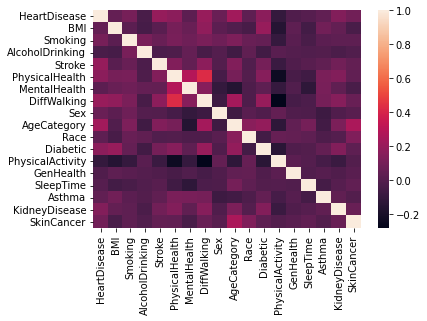

In [24]:
sns.heatmap(data.corr())
plt.show()

In [25]:
data.corr()['HeartDisease']

HeartDisease        1.000000
BMI                 0.051803
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
Sex                 0.070040
AgeCategory         0.233432
Race                0.034854
Diabetic            0.168553
PhysicalActivity   -0.100030
GenHealth          -0.011062
SleepTime           0.008327
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
Name: HeartDisease, dtype: float64

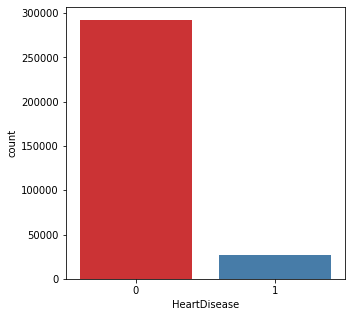

In [27]:
#Mostramos la cantidad de personas que tienen o no una enfermedad del corazon
f, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(x="HeartDisease", data=data, palette="Set1")
plt.show()

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes


*   Enfermos del corazon
*   No enfermos



In [47]:
features_mean = list(data.columns[1:-1])
dfE=data[data["HeartDisease"]==1]
dfNE=data[data["HeartDisease"]==0]

In [49]:
dfE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
5,1,28.87,1,0,0,6.0,0.0,1,0,11,2,0,0,1,12.0,0,0,0
10,1,34.30,1,0,0,30.0,0.0,1,1,8,5,2,0,3,15.0,1,0,0
35,1,32.98,1,0,1,10.0,0.0,1,1,11,5,2,1,3,4.0,0,0,1
42,1,25.06,0,0,0,0.0,0.0,1,0,12,5,2,0,2,7.0,0,0,1
43,1,30.23,1,0,0,6.0,2.0,1,0,11,5,2,1,1,8.0,0,1,0
45,1,20.37,1,0,0,3.0,0.0,0,0,10,5,0,0,3,10.0,0,0,0
77,1,34.33,0,0,0,0.0,0.0,0,0,7,5,0,1,2,8.0,0,0,0
78,1,28.29,1,0,0,30.0,30.0,0,0,10,5,2,1,3,9.0,0,1,0
101,1,24.68,1,0,0,30.0,30.0,1,1,10,5,0,1,1,8.0,0,0,1
127,1,33.65,0,0,0,2.0,0.0,1,0,10,5,2,0,1,4.0,0,0,0


In [46]:
dfNE.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,10,5,0,1,1,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,12,5,2,0,2,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,12,5,1,0,1,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,9,5,0,1,2,10.0,0,0,0
11,0,28.71,1,0,0,0.0,0.0,0,0,7,5,0,1,4,5.0,0,0,0


In [48]:
data[features_mean]

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0


In [50]:
data.corr()['HeartDisease']

HeartDisease        1.000000
BMI                 0.051803
Smoking             0.107764
AlcoholDrinking    -0.032080
Stroke              0.196835
PhysicalHealth      0.170721
MentalHealth        0.028591
DiffWalking         0.201258
Sex                 0.070040
AgeCategory         0.233432
Race                0.034854
Diabetic            0.168553
PhysicalActivity   -0.100030
GenHealth          -0.011062
SleepTime           0.008327
Asthma              0.041444
KidneyDisease       0.145197
SkinCancer          0.093317
Name: HeartDisease, dtype: float64

## **4. Imputar datos**
Para este no tenemos datos faltantes.

## **Paso 2**
* ### **Preparar el Conjunto de Datos**

* ### **Dividir el Conjunto de Datos**
Necesitamos dividir nuestros datos en dos partes

1.   Para el entramiento del modelo
2.   Para las pruebas del modelo 




In [28]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


In [29]:
x = data.drop(['HeartDisease'], axis = 1)
y = data['HeartDisease']

In [30]:
x

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,1,0,0,7.0,0.0,1,1,8,3,2,0,1,6.0,1,0,0
319791,29.84,1,0,0,0.0,0.0,0,1,3,3,0,1,4,5.0,1,0,0
319792,24.24,0,0,0,0.0,0.0,0,0,5,3,0,1,2,6.0,0,0,0
319793,32.81,0,0,0,0.0,0.0,0,0,1,3,0,0,2,12.0,0,0,0


In [31]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int8

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 1)

In [33]:
x_test

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
301988,24.30,0,0,0,0.0,15.0,0,0,4,5,0,1,0,7.0,0,0,0
223127,23.78,1,0,1,0.0,0.0,1,0,12,2,2,0,2,7.0,0,0,0
216797,20.60,1,0,0,0.0,0.0,0,0,10,5,0,1,2,7.0,0,0,0
234217,28.29,1,0,0,0.0,20.0,0,0,1,5,0,0,2,4.0,0,0,0
30822,33.00,0,0,0,0.0,0.0,0,1,11,5,2,1,0,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184518,20.92,1,0,0,0.0,0.0,0,1,11,5,0,1,0,12.0,0,0,1
272494,24.19,0,0,0,3.0,0.0,0,0,0,5,0,1,4,7.0,1,0,0
205144,34.09,1,0,0,28.0,0.0,0,1,8,5,0,1,2,7.0,0,0,0
182600,41.57,0,0,0,0.0,1.0,1,0,10,5,2,0,2,4.0,1,0,0


## **Paso 4**
* ### **Entrenar el Modelo**

* ### **Hacer las Predicciones**


In [53]:
logistic = LogisticRegression(max_iter=3000)

In [54]:
logistic.fit(x_train, y_train)

LogisticRegression(max_iter=3000)

In [55]:
y_pred = logistic.predict(x_test)

In [59]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %s" % "{0:.3%}".format(accuracy))

Accuracy: 91.602%


In [63]:
precision = metrics.precision_score(y_test, y_pred)
print("Precision: %s" % "{0:.3%}".format(precision))

Precision: 50.710%


# TODO LO DE ABAJO NO SE ACTUALIZO PARA NUESTRO MODELO

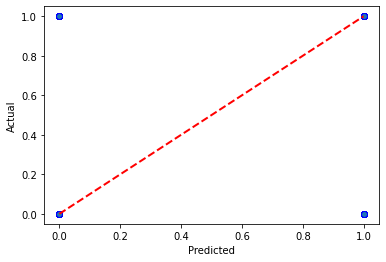

In [64]:
fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

Text(0.5, 1.0, 'Predicted vs Actual values')

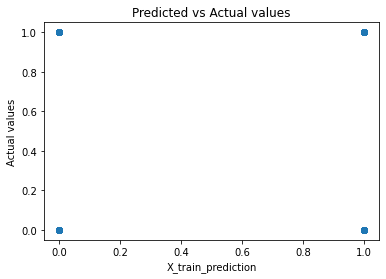

In [65]:
# visualize actual and predicted values on test data
plt.scatter(y_pred,y_test)
plt.xlabel('X_train_prediction')
plt.ylabel('Actual values')
plt.title('Predicted vs Actual values')

## **Paso 5**
* ### **Metricas de Regresion**


>1.   **Mean Absolute Error** <br>
El error absoluto medio (MAE) es una de las métricas más comunes que se utiliza para calcular el error de predicción del modelo.
MAE viene dado por la siguiente fórmula: <br>
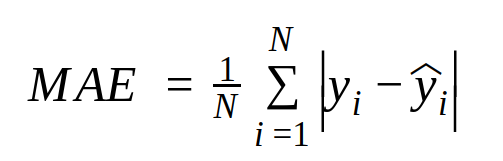
>2.   **Mean Squared Error**<br>
El error cuadrático medio (MSE) toma la diferencia cuadrática media entre el objetivo y los valores predichos. Este valor se usa ampliamente para muchos problemas de regresión y los errores más grandes tienen contribuciones cuadráticas correspondientemente más grandes al error medio. <br>
MSE viene dado por la siguiente fórmula:<br>
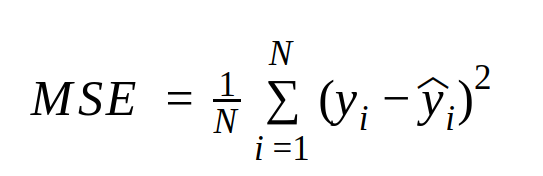
>3.   **R2 Score**<br>
La puntuación R^2 determina qué tan bien las predicciones de regresión se aproximan a los puntos de datos reales.<br>
El valor de R^2 se calcula con la siguiente fórmula:<br>
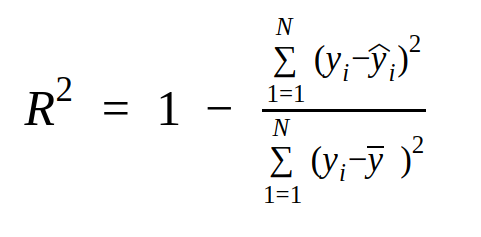


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', (metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 0.1464245174249193
Mean Squared Error: 0.0670477707540304
R2 Score: 0.13044494909836535


In [40]:
print(regressor.coef_)
print(regressor.intercept_)

[ 7.35385268e-05  2.54945701e-02 -1.70736319e-02  1.96441219e-01
  2.34023608e-03  4.74816841e-04  5.78963031e-02  5.05497284e-02
  1.25218746e-02  2.00043787e-03  3.17858576e-02 -1.00348270e-02
 -1.62826354e-03 -1.77068016e-04  2.22900210e-02  1.08728207e-01
  2.66890457e-02]
-0.07142391868645291


In [41]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
BMI,0.000074
Smoking,0.025495
AlcoholDrinking,-0.017074
Stroke,0.196441
PhysicalHealth,0.002340
MentalHealth,0.000475
DiffWalking,0.057896
Sex,0.050550
AgeCategory,0.012522
Race,0.002000


In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
301988,0,0
223127,1,1
216797,0,0
234217,0,0
30822,1,0
...,...,...
184518,0,0
272494,0,0
205144,1,0
182600,0,0
